<a href="https://colab.research.google.com/github/bonsoul/A-B-Testing_AD_Campaigns/blob/main/Energy_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
import plotly.express as px
import warnings
color = sns.color_palette()
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/PJME_hourly.csv')
data.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [5]:
data.describe()

,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


In [6]:
#checking null values

data.isnull().sum()

Datetime    0
PJME_MW     0
dtype: int64

In [8]:
# setting the datetime index

data.set_index('Datetime')

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


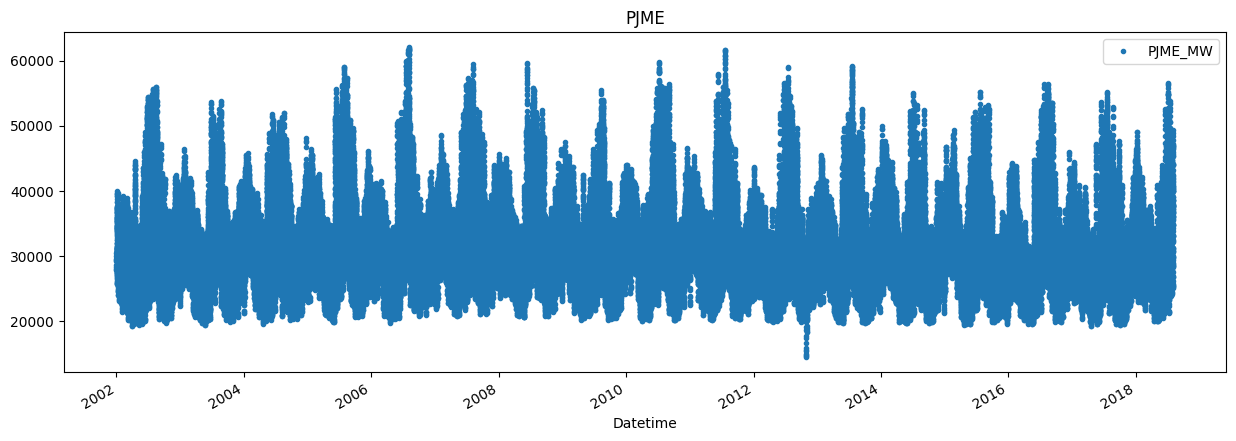

In [10]:
#visualizing the data

data.plot(style='.', figsize= (15,5), title = 'PJME')
plt.show()

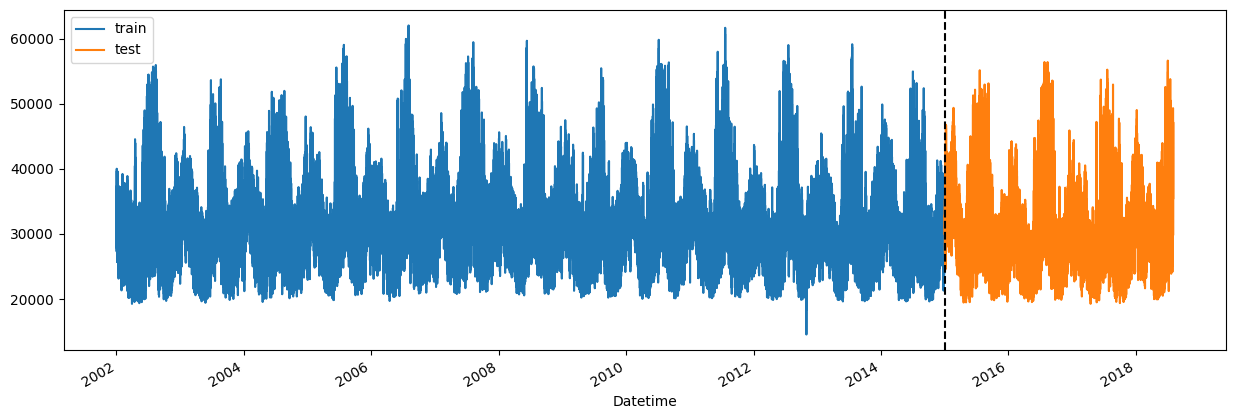

In [15]:
# train test split

train = data.loc[data.index < '01-01-2015']
test = data.loc[data.index >= '01-01-2015']

fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label = 'Training Set')
test.plot(ax=ax, label = 'Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Testing Set'])
plt.legend(['train'] + ['test'])
plt.show()


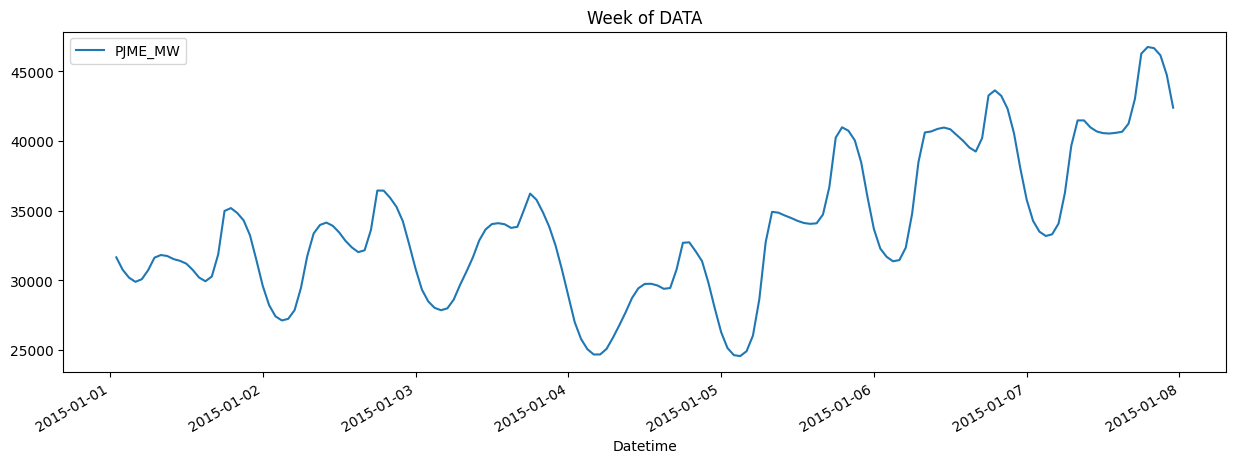

In [20]:
data.loc[(data.index > '01-01-2015') & (data.index < '01-08-2015')].plot(figsize=(15,5), title = 'Week of DATA')
plt.show()

In [32]:
# feature engineering
def create_features(df):
   df['hour'] = df.index.hour
   df['day'] = df.index.day
   df['dayofweek'] = df.index.dayofweek
   df['month'] = df.index.month
   df['year'] = df.index.year
   df['dayofyear'] = df.index.dayofyear
   df['quarter'] = df.index.quarter
   df['weekofyear'] = df.index.isocalendar().week # Use isocalendar() to get week of year
   return df

In [33]:
data = create_features(data)
data.head()

,Datetime,PJME_MW,hour,day,dayofweek,month,year,dayofyear,quarter,weekofyear
Datetime,,,,,,,,,,
2002-12-31 01:00:00,2002-12-31 01:00:00,26498.0,1,31,1,12,2002,365,4,1
2002-12-31 02:00:00,2002-12-31 02:00:00,25147.0,2,31,1,12,2002,365,4,1
2002-12-31 03:00:00,2002-12-31 03:00:00,24574.0,3,31,1,12,2002,365,4,1
2002-12-31 04:00:00,2002-12-31 04:00:00,24393.0,4,31,1,12,2002,365,4,1
2002-12-31 05:00:00,2002-12-31 05:00:00,24860.0,5,31,1,12,2002,365,4,1


**Visualizing our Feature and Target Relationship**


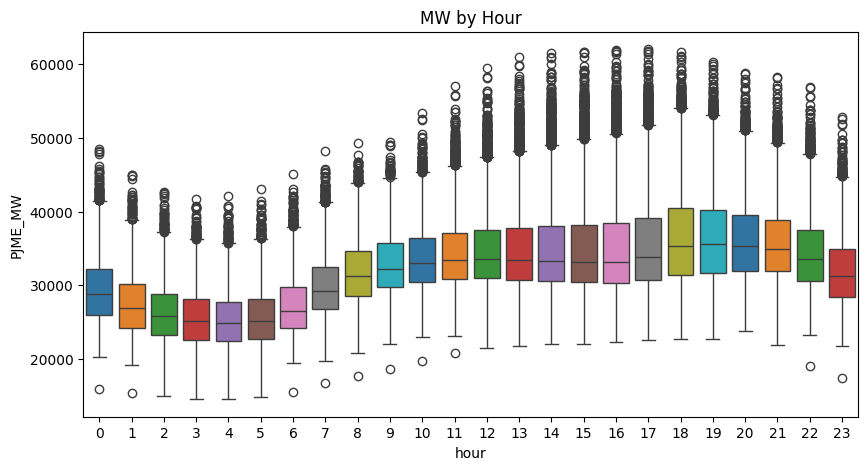

In [39]:
#visualizing

fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=data, x='hour', y='PJME_MW',palette = color)
ax.set_title('MW by Hour')
plt.show()

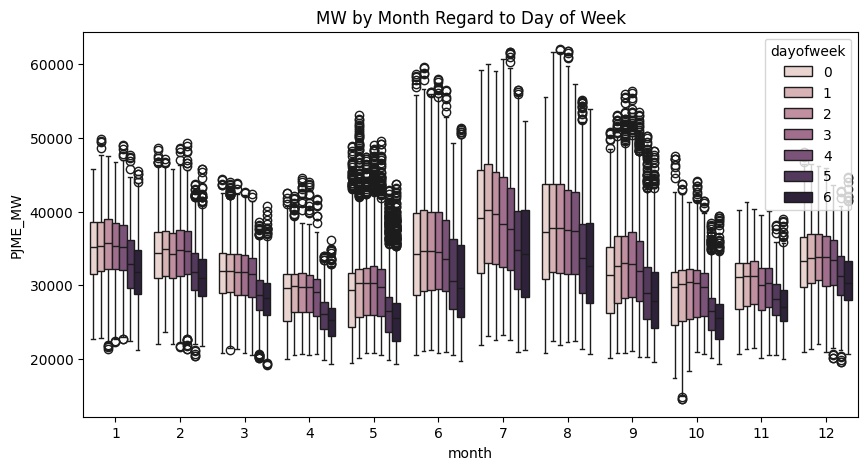

In [46]:
#visualizing

fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=data, x='month', y='PJME_MW',  hue='dayofweek')
ax.set_title('MW by Month Regard to Day of Week')
plt.show()

#Defining the model

In [49]:
train = create_features(train)
test = create_features(test)

FEATURES = ['hour', 'day', 'dayofweek', 'month', 'year', 'dayofyear', 'quarter', 'weekofyear']
TARGET = 'PJME_MW'

x_train = train[FEATURES]
y_train = train[TARGET]

x_test = test[FEATURES]
y_test = test[TARGET]



In [52]:
#fitting the model
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model  = XGBRegressor(n_estimators=1000, learning_rate=0.05)
model.fit(x_train, y_train , early_stopping_rounds=5, eval_set= [(x_train,y_train), (x_test,y_test)],verbose=True)


[0]	validation_0-rmse:6228.90686	validation_1-rmse:6314.40335
[1]	validation_0-rmse:6020.33749	validation_1-rmse:6127.13420
[2]	validation_0-rmse:5825.09839	validation_1-rmse:5950.30414
[3]	validation_0-rmse:5640.66411	validation_1-rmse:5784.34911
[4]	validation_0-rmse:5468.99062	validation_1-rmse:5632.57267
[5]	validation_0-rmse:5308.11195	validation_1-rmse:5492.25865
[6]	validation_0-rmse:5156.64263	validation_1-rmse:5358.75997
[7]	validation_0-rmse:5014.85979	validation_1-rmse:5234.26298
[8]	validation_0-rmse:4883.19629	validation_1-rmse:5119.44102
[9]	validation_0-rmse:4760.89251	validation_1-rmse:5012.60306
[10]	validation_0-rmse:4647.57991	validation_1-rmse:4915.71547
[11]	validation_0-rmse:4536.92643	validation_1-rmse:4824.62765
[12]	validation_0-rmse:4434.69296	validation_1-rmse:4741.67272
[13]	validation_0-rmse:4341.30699	validation_1-rmse:4664.35149
[14]	validation_0-rmse:4254.25255	validation_1-rmse:4594.11409
[15]	validation_0-rmse:4171.74168	validation_1-rmse:4526.33194
[1

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)